<a href="https://colab.research.google.com/github/YMuskrat/Emperical-Comparision-between-Jaccard-and-Cosine-similarities/blob/master/Jaccard_vs_Cosine_similarities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U nltk

**INTRODUCTION**

In this project, we will be carrying different algorithm comparisons between cosine and jaccard. Our experiment will be based on the runtime of both algorithms over large document sizes  and see how that changes as the length  of our documents changes. We will explore different representations of our documents from vector representation to dictionary representation and see how that affect the runtime.

while carrying our experiment, we examine also the effect of library function over the runtime vs "hand" coded functions (numpy dot product).

On the other hand, we will compare all-pairs documents for both our cosine and jaccard algorithms and see how that plays our and if there is a difference with the different similarity measures over the runtimes.

Logically, the runtime should increase as the size of our documents increases, which makes it very hard when dealing with very large documents( which is mostly the case). Therefore, multiprocessing behavior will be examined for better runtime and that by dividing tasks. 






In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
import math


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('reuters') #we will work with the reuters corpus

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
from nltk.corpus import reuters
r_Doc=reuters.fileids() #list of doc ids
doc=[reuters.words(r_Doc[temp]) for temp in range(60) if len(reuters.words(r_Doc[temp]))>100]

In [ ]:
# normalising documents
def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    NormalisedDocument=filter_stopwords(tokenlist)
    return NormalisedDocument
def filter_stopwords(tokenlist):
    stop = stopwords.words('english')
    return [w for w in tokenlist if w.isalpha() and w not in stop]


In [ ]:
my_doc=[dict(FreqDist(normalise(d))) for d in doc ] # bag of words representation

In [ ]:
def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
 
    return mean

In [ ]:
def Basic_Line_plot(xs, ys,label): # Line plot of our algorithms

  logxs=[np.log10(x) for x in xs]
  logys=[np.log10(y) for y in ys]
  plt.subplots_adjust(1,0,2.5,0.5)
  plt.subplot(121)
  plt.plot(xs,ys)
  plt.xlabel("Length of List")
  plt.ylabel("Average time")
  plt.title(label+"running time over size ")
   
  return logxs,logys

In [ ]:
def log_plot(log_x,log_y,label): #Log plots of our algorithms

   plt.subplot(122)
   plt.plot(log_x,log_y)
   plt.xlabel("Length of List")
   plt.ylabel("Average time")
   plt.title(label+"running time over size ")
   plt.show()
    
   slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)

   return slope,intercept


In [ ]:
def compare_all_algorithms(start,end,func1,func2,func3,func4): #comparing all algorithms
    v_cosine = []
    d_cosine = []
    j_sim=[]
    dot_cosine=[]
    for n in range(start, end, 1000):
    
        A = dict(FreqDist(reuters.words()[:n]))
        B = dict(FreqDist(reuters.words()[n:n+n]))
    
    
        Matrices = np.array(transpose(make_matrix([A,B])))
        
        
        running_time1=timeit(func1,Matrices[0], Matrices[1])
        v_cosine.append(running_time1)

        
        running_time2=timeit(func2,A, B)
        d_cosine.append(running_time2)

        running_time3=timeit(func3,A, B)
        j_sim.append(running_time3)

        running_time4=timeit(func4,Matrices[0], Matrices[1])
        dot_cosine.append(running_time4)
        
    plt.scatter(xs,j_sim)   
    plt.scatter(xs,v_cosine)
    plt.scatter(xs,d_cosine)
    plt.scatter(xs,dot_cosine)
    
    plt.xlabel("Length of List")
    plt.title("Compared four measure")
    label = ["Jaccard", "wevtor cosine without numpy","cosine represented as dictionary","vector cosine numpy dot"]
    plt.ylabel('run time')
    plt.show()
        
    return

In [ ]:
xs = []
def jac_algorithm_runtime_over_size(start,end,func):
  
  ys=[]
  for n in range(start, end, 1000):
    A = dict(FreqDist(reuters.words()[:n]))
    B = dict(FreqDist(reuters.words()[n:n+n]))
    run_time=timeit(func,A,B)
    xs.append(n)
    ys.append(run_time)
  print("\n")  
  log_x,log_y=Basic_Line_plot(xs,ys,"jaccard")
  
  slope,intercept=log_plot(log_x,log_y,"jaccard")

  print("Slope is {} and intercept is {}".format(slope,intercept))

  return ys


In [ ]:
def cosine_vector_algorithm_runtime_over_size(start,end,func):
  cosine_ys = []
  xs=[]
  for n in range(start, end, 1000):
    
    A = dict(FreqDist(reuters.words()[:n]))
    B = dict(FreqDist(reuters.words()[n:n+n]))
    
    Matrix = np.array(transpose(make_matrix([A,B])))
    
    running_time=timeit(func,Matrix[0], Matrix[1])
    xs.append(n)
    cosine_ys.append(running_time)

  log_c_x,log_c_y=Basic_Line_plot(xs,cosine_ys,"vector cosine")
  print("\n")
  slope,intercept=log_plot(log_c_x,log_c_y,"vector cosine")

  print("Slope is {} and intercept is {}".format(slope,intercept)) 
  return cosine_ys


In [ ]:
def cosine_dic_algorithm_runtime_over_size(start,end,func):
  time= []
  xs=[]
  for n in range(start, end, 1000):
    
    A = dict(FreqDist(reuters.words()[:n]))
    B = dict(FreqDist(reuters.words()[n:n+n]))
    
    xs.append(n)

    running_time=timeit(func,A, B)
    time.append(running_time)
  
  log_c_x,log_c_y=Basic_Line_plot(xs,time,"dictionary cosine")
  print("\n")
  slope,intercept=log_plot(log_c_x,log_c_y,"dictionary cosine")

  print("Slope is {} and intercept is {}".format(slope,intercept)) 
  return time

# **QUESTION 1**

Present an analysis of the theoretical running time of Jaccard’s similarity measure applied to large documents represented as bags of words (in a Python dictionary). Test your analysis empirically by timing and plotting various calculations of Jaccard similarity on your computer. Estimate relevant constants for your implementation and computer.

**Jaccard Similarity**

Jaccard Similarity of Jaccard index is an algorithm used to measure the similarity between sets. In the context of this assignment, our sets will be large documents.

Mathematically the jaccard, is the intersection between documents over the union of both. $J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$

The way we will apply the jaccard algorithm to our documents, is by representing our documents as bag of words, where each words has its correspending occurence on the document. From the bag of words representation we will derive the intersection and the union of any two documents fed to our jaccard algorithm.


In [ ]:
def maketotal(dict1): #calculate the union between any documents
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard(dict1,dict2):
    intersection={}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item])
            
    intersectiontot=maketotal(intersection)
    union = maketotal(dict1)+maketotal(dict2)-intersectiontot
    return intersectiontot/union

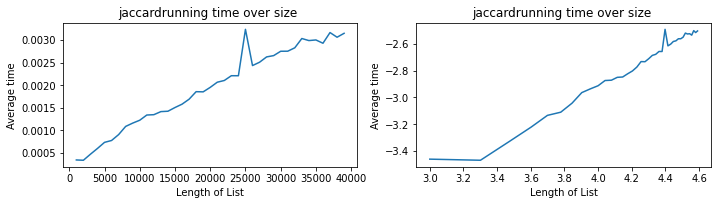

Slope is 0.7039906672742301 and intercept is -5.727664954347568


In [ ]:
import time
import numpy as np
import scipy.stats as stats

result=jac_algorithm_runtime_over_size(1000,40000,jaccard) #the runtime of our jaccard algorithm when the range of our documents goes from 1000 to 4000


**Analysis**

Above, we can clearly see that (other than some exception which might be due to the fact that my computer is doing similar tasks on the sides at that point in time) that there is an increasing trend as the number of documents grows larger. 

The running time of our jaccard depends heavily on the document sizes. Theoretically, since we have used dictionaris to store our documents, the access time will be O(1) since we will just look at what is stored in that item. Unlike list, in which we have to iterate over the list which leads to $O(n^{2})$. Using dictionaries Theoretically will lead us to an O(n) complexity. 

From the graph above, give that $y=c_a.x^n$, to have a straight line we multiply by the logarithm on both sides, hence, $\log(y) = \log(c_a) + n \log(x)$, our second graph represent ( which is roughly a straight line) represent the graph of the previous equation. From the graph, we emperically have $O(n^{0.75})$, which is close to $O(n^{1})$, the reason for that, is the fact that certain instructions that are carried out $O(n^{1})$ times due to the look up of of what is stored on the hash of the item. If we make n large, we might start reaching $O(n^{1})$ 

# **Question 2**

What is the theoretical worst case running time of the cosine similarity measure applied to documents represented as (dense representation) vectors? Show that this is the case empirically. Estimate the constant for your implementation and computer. Compare using the implementation of the dot product in numpy with your own implementation.

**COSINE SIMILARITY**

In nutshell, like jaccard, the goal of cosine is also to measure the similarity between two vectors, in our case, large documents.

Mathematically speaking, the cosine measure the distance between vectors, the two vectors in our case is just arrays or matrices containing the "bag of words" or words counts of the words occured in the two documents. $cos\theta = \cfrac{A\cdot B}{\sqrt{A\cdot A}\sqrt{B\cdot B}}$. A and B represents the length of our vectors, which is basically the distance from the origin of each vector, and our cosine similarity will between 0 and 1.

The difference between cosine and jaccard, is that the cosine is more prone to the occurences of a word than the jaccard. Meaning that as the occurences of a words increases the similarity will change, unlike the jaccard. the reason for that is that jaccard, takes the unique sets of words, while the cosine takes the total length. 





In [ ]:
def make_matrix(list_of_dicts):
    #first of all make a list of all of the features that occur in any document - these will be the dimensions of the matrix
    allfeatures={}    
    for docdict in list_of_dicts:
        for feat in docdict.keys():
            allfeatures[feat]=1
    
    dimensions=list(allfeatures.keys())
    #don't strictly need to sort it - but it is good practise to make sure it is reproducible
    sorted(dimensions)
    
    matrix=[]
    #each row in the matrix will be one of the dimensions
    for dimension in dimensions:
        row=[]
        #look up the appropriate value for each document
        for docdict in list_of_dicts:
            row.append(docdict.get(dimension,0)) #this will append the document's value if present, 0 otherwise
        matrix.append(row)
        
        
    return matrix

## it might be useful to be able to transpose a matrix so we can compare documents
def transpose(matrix):
    transposed=[]
    for i in range(0,len(matrix[0])):
        transposed.append([row[i] for row in matrix])
        
    return transposed


In [ ]:
def cosine_dense_rep(A,B): #dense representation
  num=0
  d1=0
  d2=0
  for i in range(len(A)):
    num+=A[i]*B[i]
    d1+= A[i]*A[i]
    d2+=B[i]*B[i]

  return num/math.sqrt((d1*d2))

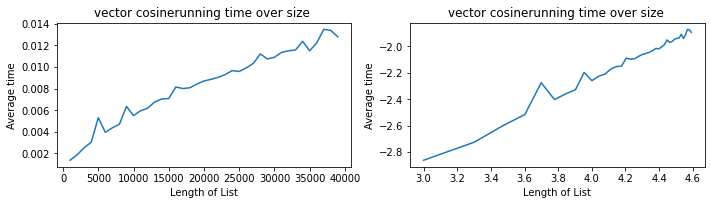

Slope is 0.6155562590614626 and intercept is -4.708246040774188


In [ ]:
cosine_ys=cosine_vector_algorithm_runtime_over_size(1000,40000,cosine_dense_rep) # runtime of cosine dense representation over the length of the list

In [ ]:
def cosine_np(A,B): #using dot product
    num=0
    for i in range(len(A)):
         num+=A[i]*B[i]
    return np.dot(A,B)/math.sqrt(cosine_dense_rep(A,B)/num)

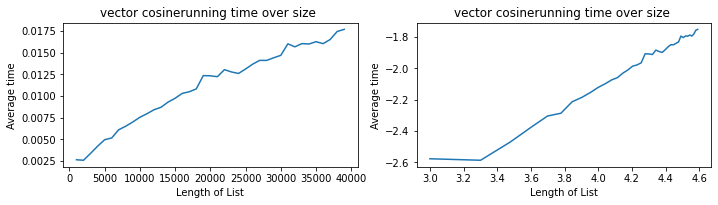

Slope is 0.5960660518943791 and intercept is -4.498065291131102


In [ ]:
cosine_np_ys=cosine_vector_algorithm_runtime_over_size(1000,40000,cosine_np) #runtime of cosine numpy dot representation over the length of the list

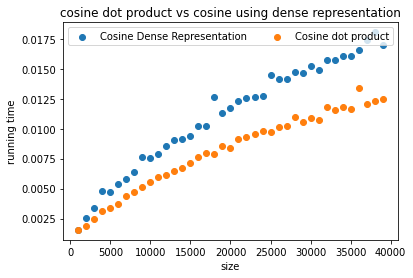

In [ ]:
plt.scatter(xs,cosine_np_ys)
plt.scatter(xs,cosine_ys)
plt.title("cosine dot product vs cosine using dense representation")

label = ["Cosine Dense Representation","Cosine dot product"]
plt.legend(label, loc = 0, ncol = 2)
plt.ylabel('running time')
plt.xlabel('size')
plt.show()

**Analysis** 

Theoretically, we have to convert our bag of words to a matrice representation, having the frequency of the words. Once we have our Matrice representation then we calculate our cosine similarity, by calculating the dot product by iterating through the matrices and dividing the total by the magnitude. Doing so, will take $O(n)$

In this question, we have calculated our cosine similarity using dense vectors and  by using the dot product available through numpy. First of all before comparing both, we can see the the run time of our cosine algorithm (be it dense representation of by dot product) increases as our the length of our documents increases. We have claimed that the complexity of our cosine algorithm will be  $O(n)$, let's verify that experimently.

Experimently, we can see that through the slope we calculated on both graphs using  $\log(y) = \log(c_a) + n \log(x)$, gave us a complexity of $O(n^{0.62})$ and $O(n^{0.59})$, for dense vector and nupmy dot product, respectively. We have certain instructions that are carried out of the loop and they take O(1) which makes the power lower than the theoretical value. if we make n large we will start getting close to  $O(n^{1})$.

Comparing the two approaches illustrated in the last graph, we can see that using the numpy dot product we can decrease the the running time ( even if both are going in the same trend) due to the fact that the numpy dot product is optimized.


# **QUESTION 3**

Write a function which computes cosine similarity directly from sparse (dictionary) representations without converting them into dense (vector) representations. Test your function for correctness and compare its efficiency theoretically and empirically to (i) your previous implementation of the cosine similarity, and (ii) your implementation of Jaccard’s measure.

In [ ]:
def dic_cosine(A_dic,B_dic): #calculating the cosine similarity based on dictionary representation the naive apprachch
  count=0
  num=0
  for word,key in A_dic.items():
    for word1,key1 in B_dic.items():
      if(word==word1):
        count +=key*key1
  
  return count
  

In [ ]:
def cos1(d1,d2):
    numerator = dic_cosine(d1,d2)
    denominator = math.sqrt(dic_cosine(d1,d1)*dic_cosine(d2,d2))
    return numerator/denominator

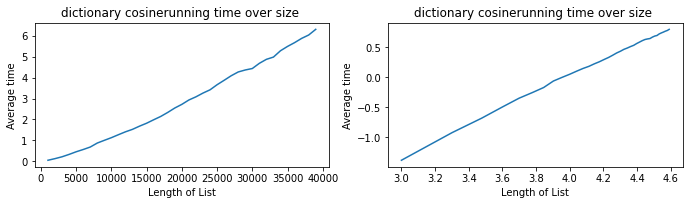

Slope is 1.3373990095312271 and intercept is -5.323236105922048


In [ ]:
cosine_np_ys=cosine_dic_algorithm_runtime_over_size(1000,40000,cos1)

In [ ]:
def d_cosine(A_dic,B_dic): #calculating the cosine similarity based on dictionary representation using the get method
  count=0
  num=0
  for word,key in A_dic.items():
    
        count +=key*B_dic.get(word,0)
  
  return count
  

In [ ]:
def cos(d1,d2): #cosine similarity function
    numerator = d_cosine(d1,d2)
    denominator = math.sqrt(d_cosine(d1,d1)*d_cosine(d2,d2))
    return numerator/denominator

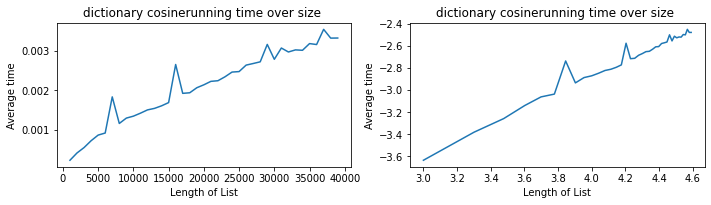

Slope is 0.6961993186915266 and intercept is -5.6530801087983935


In [ ]:
cosine_dic=cosine_dic_algorithm_runtime_over_size(1000,40000,cos)

Therotically, using the dictionaries, the lookup for certain hash items will takes us different time complexities based on the way we approach it. In here, the first method, we used two loops to iterate through the dicitonary to find the key values of each word, therefore, theoretically, we should expect to have $O(n^{2})$. 

On the other hand, we can use the get method, to get the hash value of the items, which is done in O(1), in which it will reduce our running time tromendously, and we should expect the time complexity to be $O(n)$ due to the fact we have only one loop which iterate through the key of the first dictionary and the get method takes the value from the second dictionary in O(1) time.

In general from the above graphs, we can see that the trend is increasing as the length of our lists increases but they have different run times.
From the graphs above, and based on the slopes generated accoring the following equation  $\log(y) = \log(c_a) + n \log(x)$.  we can see that when we used to the loop to iterate our complexity was $O(n^{1.33})$ which is close to that of the theoretical complexity.

On the other hand, We have a complexity of $O(n^{0.69})$ which is close to $O(n^{1})$. Same reasoning, we have certain instructions that are outside of the loop and takes only O(1) time complexity and that reduces our running time. if we manage to get n large we will converge to the theoretical complexity

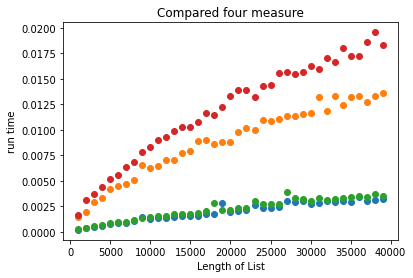

In [ ]:
compare_all_algorithms(1000,40000,cosine_dense_rep,cos,jaccard,cosine_np)

From the Graph above when comparing all the algorithms, we can see that they all increase as the length of our list increases, but there is a difference in performance. The running time of the cosine vector without dot product takes the longest amount of time. The running time when using the numpy dot product reduces but still does out preform the jaccard and cosine when using dictionaries. 

for dense vectors without numpy dot, 

# **Question 4**

Write a function which computes all-pairs similarities for a collection of documents. The function should take a list of dictionaries (the document collection) and a parameter specifying the similarity measure to be used. What is the theoretical worst-case running time for computing all-pairs similarities? Does it matter what the similarity measure is? Can you give an estimate of how long it would take to compute all-pairs similarities for 200K documents for both measures? (Note: that whilst you should test your function for all-pairs similarities (with d > 10), you do not need to prove the theoretical worst case empirically or test with 200K documents!)

In [ ]:
from timeit import default_timer as timer
def allpairs(func,my_doc):
  sims=[]
  k_num=0
  j_num=0
  time_collection=[]
  number_collection=[]
  for docA in my_doc:
    rowsims=[]
    for docB in my_doc:
      start = timer()
      rowsims.append(func(docA,docB))
      end = timer()
      k_num=k_num+(end-start)
      time_collection.append(k_num)
      j_num+=1
      number_collection.append(j_num)
  
    sims.append(rowsims)
  
  return number_collection,time_collection
    
 

[[1.0, 0.017543859649122806, 0.053406998158379376, 0.05065666041275797, 0.04081632653061224, 0.043557168784029036, 0.07858243451463791, 0.033073929961089495, 0.08729139922978177, 0.021653543307086614, 0.05008635578583765, 0.06429780033840947, 0.017928286852589643, 0.1780185758513932, 0.0275049115913556, 0.015151515151515152, 0.013671875, 0.14772727272727273, 0.04355108877721943, 0.03300970873786408, 0.0273972602739726, 0.031078610603290677, 0.04736842105263158, 0.021611001964636542, 0.021568627450980392, 0.07879924953095685, 0.033932135728542916, 0.021484375, 0.06655574043261231, 0.10436893203883495, 0.09494451294697903, 0.05719237435008666, 0.0633147113594041, 0.028225806451612902, 0.10018552875695733, 0.02766798418972332, 0.044444444444444446, 0.04844290657439446, 0.07879924953095685, 0.02610441767068273, 0.08983451536643026, 0.03046594982078853, 0.021696252465483234, 0.03131115459882583, 0.044802867383512544, 0.019801980198019802, 0.09214501510574018, 0.013861386138613862, 0.0527343

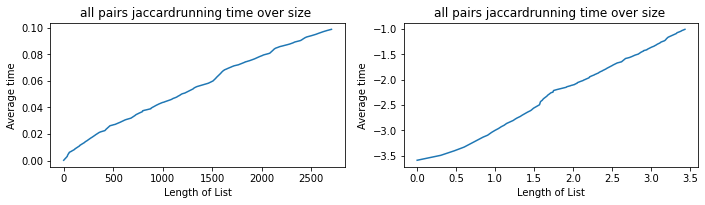

Slope is 0.7800179155259567 and intercept is -3.6847809615510108


In [ ]:
x,y=allpairs(jaccard,my_doc)
log_x,log_y=Basic_Line_plot(x,y,"all pairs jaccard")
slope,intercept=log_plot(log_x,log_y,"all pairs jaccard")

print("Slope is {} and intercept is {}".format(slope,intercept)) 

[[1.0, 0.14678870596667254, 0.23817091133471066, 0.23998951285615608, 0.17268574301401043, 0.1964715347957144, 0.268961527164016, 0.17823087226084494, 0.2912533167338518, 0.16040038989338837, 0.1673080206631091, 0.22213469470710603, 0.1487244648158189, 0.6715041978601773, 0.15658894460121545, 0.03930016542762631, 0.09878309528375465, 0.45782109766130896, 0.214618645270006, 0.14773720121759454, 0.10521406863856567, 0.12877834279383205, 0.19707054133646593, 0.12685154327472883, 0.1848077697665864, 0.552946531486903, 0.20229749422389054, 0.16291830363614462, 0.19660524632035115, 0.39595319542548113, 0.1969790290064447, 0.1770014130950007, 0.24254275026899952, 0.12494645075365794, 0.5553141450572007, 0.09082281268746632, 0.10913362245482076, 0.1499076338615899, 0.552946531486903, 0.24120824662687113, 0.21396138831028588, 0.15217404053986083, 0.15249074946337718, 0.16750777129763592, 0.16933929334802078, 0.15706752464551563, 0.3699284743793765, 0.10816473660573886, 0.22598429250326563, 0.14

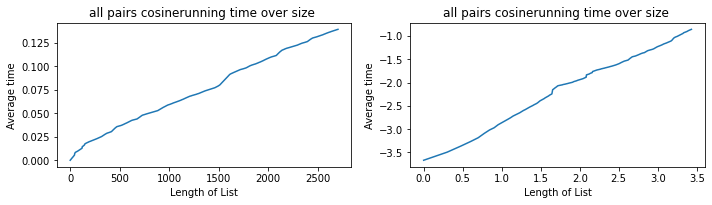

Slope is 0.7696435046673792 and intercept is -3.5148362118485963


In [ ]:
x,y=allpairs(cos,my_doc)
log_x,log_y=Basic_Line_plot(x,y,"all pairs cosine")
slope,intercept=log_plot(log_x,log_y,"all pairs cosine")

print("Slope is {} and intercept is {}".format(slope,intercept)) 

All pair similarities, means we compare all documents against all documents for similarity. In here, we use our allpair functions to find all the two combination of our documents so we can feed them to the cosine and jaccard algorithms for similarity. Both algorithms have a similar trend, incearsing while the length of the documents increases. 

Theoritically, both algorithms should take $O(n)$ (explained before why). so the the all pairs combination shouldn't affect our runtime or make it more than $O(n)$ , unless we take the iteration to make the all pairs into account( which we did not in this experiment).

Mathematically, based on the equation $\log(y) = \log(c_a) + n \log(x)$, we can find that our slope will lead us to have a complexity of $O(n^{0.76})$. This value is close to $O(n)$ since we have some instructions outside of the function that $O(1)$, if n is large we will converge to $O(n)$.

The algorithms fed to our all pairs algorithm affects the running time, we can see from here, that our jaccard is still faster from our cosine.

FOR 200k documents, y is $10^{-3}*(200000)=200 h$ for both cosine and jaccard, approximatly.

# **QUESTION 5**

**Write a function that implements all-pairs similarities for documents and uses some form of parallel computing, e.g. MapReduce. Make sure you test your function empirically for correctness and for efficiency. Investigate the number of parallel processes that gives optimal results for your implementation and computer.**

In [ ]:
from itertools import combinations
from collections import Counter
from itertools import islice
def all_pair(document):
    
      valueIndex = list(range(len(document)))
      k=list(combinations((valueIndex),2))
      valueIndex.remove(0)
      valueIndex.reverse()

      Inputt = iter(k)
      Output = [list(islice(Inputt, elem))
          for elem in valueIndex]
    
      return Output

In [ ]:
# my mapper function
def wc_mapper_parallel(document):
     output=[]
     for num in document:
        output.append((num,num))
     
     return output

In [ ]:
def j_wc_reducer_parallel(item):
    output=[]
    (word,counts)=item
    for c in counts:
      A=my_doc[c[0]]
      B=my_doc[c[1]]
      jac=jaccard(A,B)
      
      output.append(((c[0],c[1]),jac))
    return output

In [ ]:
def cos_wc_reducer_parallel(item):
    output=[]
    (word,counts)=item
    for c in counts:
      A=my_doc[c[0]]
      B=my_doc[c[1]]

      output.append(((c[0],c[1]),cos(A,B)))
    return output

In [ ]:
import collections
from multiprocessing import Pool
def map_reduce_parallel(docm,mapper,reducer,mapprocesses=3,reduceprocesses=2):
  outputs=[]
  collector=collections.defaultdict(list)  #this dictionary is where we will store intermediate results
                                 #it will map keys to lists of values (default value of a list is [])
                                 #in a real system, this would be stored in individual files at the map nodes
                                 #and then transferred to the reduce nodes
    
  all_pair(docm)
 
  

  mappool = Pool(processes=mapprocesses)
  #map stage
  mapresults=mappool.map(mapper,  all_pair(docm))
  
  #print("i am here")
  #print(mapresults)
  
  mappool.close()

  collector=collections.defaultdict(list)
  for mapresult in mapresults:
    for (key, value) in mapresult:     #pass each input to the mapper function and receive back each key,value pair yielded
      collector[key].append(value)     #append the value to the list for that key in the intermediate store


  reducepool = Pool(processes=reduceprocesses)
  #reduce stage
  reduceresults=reducepool.map(reducer,collector.items())
  reducepool.close()
  for reduceresult in reduceresults:
    outputs+=reduceresult
  return outputs

In [ ]:
timeit(map_reduce_parallel,my_doc,wc_mapper_parallel,j_wc_reducer_parallel,mapprocesses=7,reduceprocesses=7)

0.24202895164489746

In [ ]:
timeit(map_reduce_parallel,my_doc,wc_mapper_parallel,j_wc_reducer_parallel,mapprocesses=3,reduceprocesses=3)

0.1402402400970459

In [ ]:
timeit(map_reduce_parallel,my_doc,wc_mapper_parallel,cos_wc_reducer_parallel,mapprocesses=4,reduceprocesses=4)

0.19496123790740966

Using map reduce we acheived, fast result, we can see that our time function significantly improved when comparing all pairs. The reason behind it is because  it devides the tasks to multiple nodes and everyone yield result which makes it faster, since the tasks are dispatched rather than being allocated to one.

here we did time our paralled function to check the average time it takes to find the all pair similarities of 51 documents.

using 3 processes made it faster was one of the optimal numbers since the tasks are dispatched to multiples processes and they work at the same time on different chunks of data. and that's why it is lower


# **CONCLUSION**

We have analyzed the jaccard similarity with the cosine similarity with different representation of the document.

We could clearly see, that we have the same trend in all the algorithms (even though certain approaches are better than the others), the time increases as the length increases of our document. the jaccard similarity was the best in terms of the running times, we have runned the jaccard algorithm over 4000 documents of length.

The jaccard similarity is better than the cosine similarity in general, and that's due t the fact that we take time of O(1) when searching for certain keys in the dictionary and that's why when we used the dictionary in the cosine we found that there is similar results with the jaccard algorithm.

For the cosine, we could find that the dot with numpy is faster and that due to the fact that numpy is an optimized library for matrices multiplication which is why the reason it was faster than dense representation. in terms of lists, we should use the get method since it hashes the key of the result in O(1) times making it faster than if we do two loops to iterate through the dictionary.

When calculating the allpair similarity, the choice of the algorithm affected the average running time, but still the jaccard outperformed, as expected even with small diffrences.

Finally, to reduce the time we used multiprocessing using map reduce, to devide the work to multiple processes and let them work in parallel, which yeild us to have a faster result.